# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
print(data.shape)
data.head()

(7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [5]:
print(train.shape)
train.head()

(5329, 5)


,id,keyword,location,text,target
1186,1707,bridge%20collapse,NaN,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,NaN,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0


In [6]:
print(test.shape)
test.head()

(2284, 5)


,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


## Задание 1 (0.5 балла)

Выведите на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [7]:
def delete_txt_missing_values(df) -> pd.core.frame.DataFrame:
    return pd.concat([df[["id", "text", "target"]], df[["keyword", "location"]].fillna("")], axis=1)

In [8]:
train.isna().any()

id          False
keyword      True
location     True
text        False
target      False
dtype: bool

In [9]:
test.isna().any()

id          False
keyword      True
location     True
text        False
target      False
dtype: bool

In [10]:
train = delete_txt_missing_values(train)
test = delete_txt_missing_values(test)

In [11]:
train.isna().any().any()

False

In [12]:
test.isna().any().any()

False

In [13]:
train

,id,text,target,keyword,location
1186,1707,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,bridge%20collapse,
4071,5789,GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1,hail,"Carol Stream, Illinois"
5461,7789,CNN: Tennessee movie theater shooting suspect ...,1,police,Houston
5787,8257,Still rioting in a couple of hours left until ...,1,rioting,
7445,10656,Crack in the path where I wiped out this morni...,0,wounds,Lake Highlands
...,...,...,...,...,...
5226,7470,@Eganator2000 There aren't many Obliteration s...,0,obliteration,Merica!
5390,7691,just had a panic attack bc I don't have enough...,0,panic,
860,1242,Omron HEM-712C Automatic Blood Pressure Monito...,0,blood,
7603,10862,Officials say a quarantine is in place at an A...,1,,


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведите информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
train.target.value_counts()

0    3024
1    2305
Name: target, dtype: int64

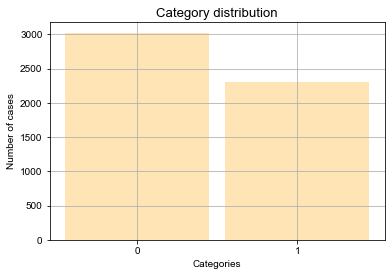

In [16]:
fig, ax = plt.subplots()
cats = ['0', '1']
quan = np.array(train.target.value_counts())
ax.bar(cats, quan, color = 'moccasin', width = 0.9)
sns.set(font_scale=1.1)
plt.title("Category distribution")
plt.xlabel("Categories")
plt.ylabel("Number of cases")
plt.grid(True)

In [17]:
most_popular_keywords = list(pd.DataFrame(train.keyword.value_counts()[:10]).index)

In [18]:
one_of = np.full((train.shape[0],), False)
for kw in most_popular_keywords:
    one_of = (one_of) | (train.keyword == kw)

In [19]:
one_of.value_counts()

False    4996
True      333
Name: keyword, dtype: int64

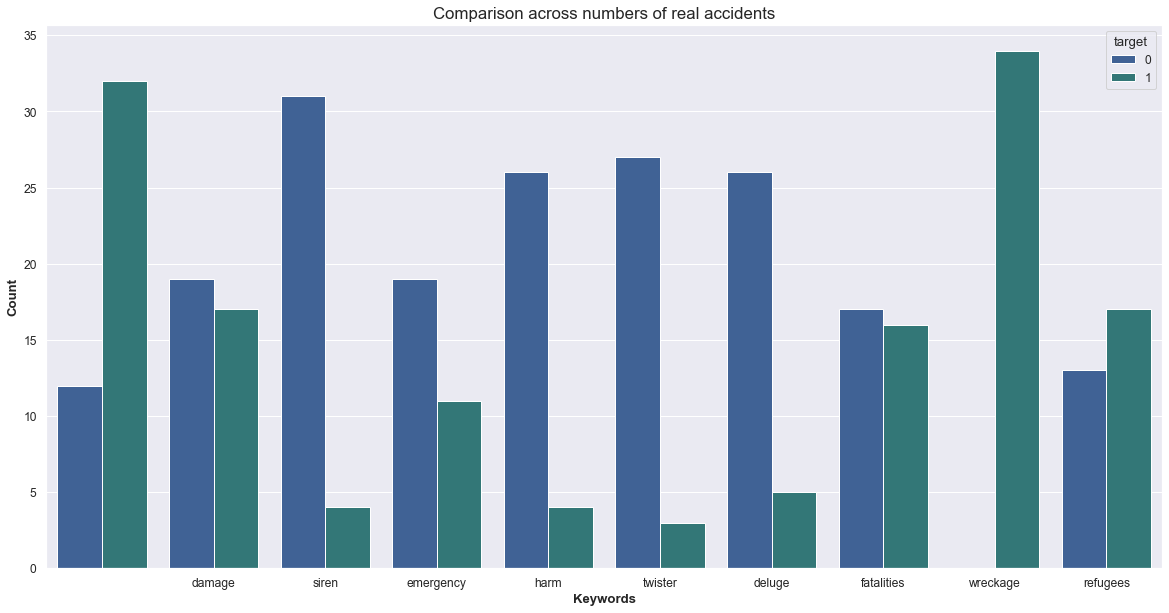

In [20]:
figure = sns.countplot(data=train[one_of], x="keyword", hue="target", saturation=0.4, palette="winter")
figure.figure.set_figwidth(20)
figure.figure.set_figheight(10)

sns.set(font_scale=1.4)
figure.set_title("Comparison across numbers of real accidents")

figure.set_ylabel("Count", fontweight="bold")
figure.set_xlabel("Keywords", fontweight="bold")

plt.show()

> Получается, что определённые ключевые слова используются чаще для описания фейковых новостей. В частности, употребление слов _siren_ и _harm_ абсолютно не означают, что что-то действительно произошло. При этом, если используется _крушение_, то имеет место быть реальная катастрофа, т.к. никто не пользовался этим словом, когда  ничего не происходило.

In [21]:
train.head()

,id,text,target,keyword,location
1186,1707,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,bridge%20collapse,
4071,5789,GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1,hail,"Carol Stream, Illinois"
5461,7789,CNN: Tennessee movie theater shooting suspect ...,1,police,Houston
5787,8257,Still rioting in a couple of hours left until ...,1,rioting,
7445,10656,Crack in the path where I wiped out this morni...,0,wounds,Lake Highlands


## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [22]:
train['info'] = train.text + train.keyword + train.location
train = train.drop(columns=['text', 'keyword', 'location'])
train = train.drop(columns=['id'])

train.rename(columns={'info': 'text'}, inplace=True)
train

,target,text
1186,0,Ashes 2015: AustraliaÛªs collapse at Trent Br...
4071,1,GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...
5461,1,CNN: Tennessee movie theater shooting suspect ...
5787,1,Still rioting in a couple of hours left until ...
7445,0,Crack in the path where I wiped out this morni...
...,...,...
5226,0,@Eganator2000 There aren't many Obliteration s...
5390,0,just had a panic attack bc I don't have enough...
860,0,Omron HEM-712C Automatic Blood Pressure Monito...
7603,1,Officials say a quarantine is in place at an A...


In [23]:
test['info'] = test.text + test.keyword + test.location
test = test.drop(columns=['text', 'keyword', 'location'])
test = test.drop(columns=['id'])

test.rename(columns={'info': 'text'}, inplace=True)
test

,target,text
2644,1,So you have a new weapon that can cause un-ima...
2227,0,The f$&amp;@ing things I do for #GISHWHES Just...
5448,1,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...
132,0,Aftershock back to school kick off was great. ...
6845,0,in response to trauma Children of Addicts deve...
...,...,...
4307,0,New cocktail on the list! El Diablo Mas Verde:...
3375,1,Bend Post Office roofers cut gas line prompt e...
1710,1,Monsoon flooding - Monsoon rains have have hit...
4898,1,Remember this was a massacre of civilians. #Hi...


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


> Используется код с [семинара 10](https://github.com/V-Marco/hse_iad4_2022/blob/main/seminar_10/solved_sem10_texts.ipynb) 

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
train

,target,text
1186,0,Ashes 2015: AustraliaÛªs collapse at Trent Br...
4071,1,GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...
5461,1,CNN: Tennessee movie theater shooting suspect ...
5787,1,Still rioting in a couple of hours left until ...
7445,0,Crack in the path where I wiped out this morni...
...,...,...
5226,0,@Eganator2000 There aren't many Obliteration s...
5390,0,just had a panic attack bc I don't have enough...
860,0,Omron HEM-712C Automatic Blood Pressure Monito...
7603,1,Officials say a quarantine is in place at an A...


In [26]:
text = np.array(train.text.copy(True))

In [27]:
text.shape

(5329,)

In [28]:
text[0: 2]

array(['Ashes 2015: Australia\x89Ûªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0bridge%20collapse',
       'GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @bmurph1019 \n@hail_Youtsey . @termn8r13 \n#GoBlue #WrestleOn http://t.co/OasKgki6QjhailCarol Stream, Illinois'],
      dtype=object)

In [29]:
cnt_vec_text = CountVectorizer()
X_text = cnt_vec_text.fit_transform(text)

In [30]:
np.array(cnt_vec_text.get_feature_names())

array(['00', '000', '0000', ..., 'ûókody', 'ûótech', 'ûówounds'],
      dtype='<U44')

In [31]:
print(f"Matrix size after CountVectorizing = {X_text.toarray().shape}")
X_text.toarray()

Matrix size after CountVectorizing = (5329, 19948)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взглянете на текст, то увидите, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле `vocabulary_` инстанса этого класса. Давайте напишем функцию, которая печатает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [32]:
text

array(['Ashes 2015: Australia\x89Ûªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0bridge%20collapse',
       'GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @bmurph1019 \n@hail_Youtsey . @termn8r13 \n#GoBlue #WrestleOn http://t.co/OasKgki6QjhailCarol Stream, Illinois',
       'CNN: Tennessee movie theater shooting suspect killed by police http://t.co/dI8ElZsWNRpoliceHouston ',
       ...,
       'Omron HEM-712C Automatic Blood Pressure Monitor STANDARD AND LARGE BP CUFFS http://t.co/gJBAInQWN9 http://t.co/jPhgpL1c5xblood',
       'Officials say a quarantine is in place at an Alabama home over a possible Ebola case after developing symptoms... http://t.co/rqKK15uhEY',
       'I moved to England five years ago today. What a whirlwind of time it has been! http://t.co/eaSlGeA1B7whirlwindStamford & Cork (& Shropshire)'],
      dtype=object)

In [33]:
import re
import string

def analyze_vocabulary(voc: list):
    numbers = re.compile('.*\d+.*')
    punct = re.compile('.*[' + string.punctuation + '].*')
    hashes_mentions = re.compile('^[#@].*')
    
    
    #  Не проще было всё же сделать цикл, чтобы по нему пройти один раз и сразу всё проверить, чем идти трижды ради того, 
    #  чтобы этот цикл избежать?
    contain_numbers = list(map(lambda token: True if numbers.fullmatch(token) else False, voc))
    contain_punctuation = list(map(lambda token: True if punct.fullmatch(token) else False, voc))
    hashes_or_mentions = list(map(lambda token: True if hashes_mentions.fullmatch(token) else False, voc))
     
    return (contain_numbers, contain_punctuation, hashes_or_mentions)

In [34]:
nums, punct, hashes = analyze_vocabulary(cnt_vec_text.vocabulary_.keys())

In [35]:
# По-другому подробно не выводится...
print("Contain numbers:", (np.array(list(cnt_vec_text.vocabulary_.keys()))[nums]).shape)
print("Contain punctuation:", (np.array(list(cnt_vec_text.vocabulary_.keys()))[punct]).shape)

Contain numbers: (4335,)
Contain punctuation: (349,)


In [36]:
print("Contain mentions or tags:", (np.array(list(cnt_vec_text.vocabulary_.keys()))[hashes]).shape)
list(np.array(list(cnt_vec_text.vocabulary_.keys()))[hashes])

Contain mentions or tags: (0,)


[]

## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [37]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [38]:
tw = TweetTokenizer()

cnt_vec_tok = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
X_tok = cnt_vec_tok.fit_transform(text)

print(f"Matrix size after TweetTokenizer + CountVectorizing = {X_tok.toarray().shape}")
X_tok.toarray()

Matrix size after TweetTokenizer + CountVectorizing = (5329, 20971)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
cnt_vec_tok.vocabulary_

{'ashes': 5046,
 '2015': 1929,
 ':': 2649,
 'australia': 5152,
 '\x89': 20856,
 'ûªs': 20939,
 'collapse': 6614,
 'at': 5081,
 'trent': 19650,
 'bridge': 5853,
 'among': 4796,
 'worst': 20610,
 'in': 13435,
 'history': 9833,
 'england': 8178,
 'bundled': 5965,
 'out': 15986,
 'for': 8899,
 '60': 2501,
 '...': 1672,
 'http://t.co/t5trhjuau0bridge%20collapse': 12348,
 'great': 9373,
 'michigan': 15025,
 'technique': 19147,
 'camp': 6091,
 'b1g': 5223,
 'thanks': 19251,
 'to': 19455,
 '@bmurph1019': 2912,
 '@hail_youtsey': 3338,
 '.': 1670,
 '@termn8r13': 4158,
 '#goblue': 581,
 '#wrestleon': 1598,
 'http://t.co/oaskgki6qjhailcarol': 11888,
 'stream': 18751,
 ',': 1646,
 'illinois': 13386,
 'cnn': 6569,
 'tennessee': 19184,
 'movie': 15301,
 'theater': 19266,
 'shooting': 18063,
 'suspect': 18977,
 'killed': 14035,
 'by': 6023,
 'police': 16504,
 'http://t.co/di8elzswnrpolicehouston': 10787,
 'still': 18693,
 'rioting': 17401,
 'a': 4411,
 'couple': 6915,
 'of': 15782,
 'hours': 9961,
 'l

In [40]:
nums, punct, hashes = analyze_vocabulary(cnt_vec_tok.vocabulary_.keys())

In [41]:
print("Contain numbers:", (np.array(list(cnt_vec_tok.vocabulary_.keys()))[nums]).shape)
print("Contain puctuation:", (np.array(list(cnt_vec_tok.vocabulary_.keys()))[punct]).shape)

Contain numbers: (4275,)
Contain puctuation: (7912,)


In [42]:
print("Contain mentions or tags:", (np.array(list(cnt_vec_tok.vocabulary_.keys()))[hashes]).shape)
list(np.array(list(cnt_vec_tok.vocabulary_.keys()))[hashes])

Contain mentions or tags: (3360,)


['@bmurph1019',
 '@hail_youtsey',
 '@termn8r13',
 '#goblue',
 '#wrestleon',
 '#mlbairplane',
 '@johnsontionne',
 '@libertarianluke',
 '@roughdeal1',
 '@zhenghxn',
 '@rayquazaerk',
 '@jackmulholland1',
 '@1acd4900c1424d1',
 '@foxnews',
 '#bcpoli',
 '#canpoli',
 '#vanpoliforest',
 '#shoes',
 '#tweetlikeitsseptember11th2001',
 '@_gaabyx',
 '@buffoonmike',
 '@toddstarnes',
 '#tomclancymilitary',
 '#hannaph',
 '#news',
 '#bbc',
 '#cnn',
 '#islam',
 '#truth',
 '#god',
 '#isis',
 '#terrorism',
 '#quran',
 '#lies',
 '@mylittlepwnies3',
 '@early__may',
 '@anathemazhiv',
 '@tonysandos',
 '@dailykospoliceus',
 '#dream',
 '#magic',
 '#linden',
 '#',
 '@wwp',
 '#clientwoundedfredericksburg',
 '#til_now',
 '#cnbcwrecked',
 '@marc_holl',
 '@nennicook',
 '@aitchkaycee',
 '@vixstuart',
 '@benjbeckwith',
 '#disaster',
 '#gbbo',
 '#mudslidemudslidetring',
 '@graysondolan',
 '@startelegram',
 '#solar',
 '#japanese',
 '#fukushima',
 '#childhood',
 '#trauma',
 '@keithboykin',
 '@randallpinkston',
 '@pozarmy

> Как и было сказано ранее, default'ный tokenizer удаляет практически всю пунктуацию, оставляя лишь $\approx 4 \% $ от изначального количества символов пунктуации. В то же время TweetTokenizer оставляет возможность взаимодействовать с различными конструкциями и получать больше информации от пунктуационных символов.

In [43]:
text

array(['Ashes 2015: Australia\x89Ûªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0bridge%20collapse',
       'GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @bmurph1019 \n@hail_Youtsey . @termn8r13 \n#GoBlue #WrestleOn http://t.co/OasKgki6QjhailCarol Stream, Illinois',
       'CNN: Tennessee movie theater shooting suspect killed by police http://t.co/dI8ElZsWNRpoliceHouston ',
       ...,
       'Omron HEM-712C Automatic Blood Pressure Monitor STANDARD AND LARGE BP CUFFS http://t.co/gJBAInQWN9 http://t.co/jPhgpL1c5xblood',
       'Officials say a quarantine is in place at an Alabama home over a possible Ebola case after developing symptoms... http://t.co/rqKK15uhEY',
       'I moved to England five years ago today. What a whirlwind of time it has been! http://t.co/eaSlGeA1B7whirlwindStamford & Cork (& Shropshire)'],
      dtype=object)

In [44]:
TweetTokenizer().tokenize(text[0])

['Ashes',
 '2015',
 ':',
 'Australia',
 '\x89',
 'Ûªs',
 'collapse',
 'at',
 'Trent',
 'Bridge',
 'among',
 'worst',
 'in',
 'history',
 ':',
 'England',
 'bundled',
 'out',
 'Australia',
 'for',
 '60',
 '...',
 'http://t.co/t5TrhjUAU0bridge%20collapse']

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью `TweetTokenizer` из пакета `nltk`
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены, содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в `nltk.corpus.stopwords.words('english')`
4. Проведет стемминг с помощью `SnowballStemmer`

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [45]:
line = text[26]

In [46]:
line

'Maryland mansion fire that killed 6 caused by damaged plug under Christmas tree report says - Into the flames... http://t.co/lKJFabQzb3flamesSomewhere Around You'

In [47]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [48]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [49]:
def tokenizer(line: str) -> list:
    line = line.lower()
    
    
    tokenized_line = np.array(TweetTokenizer().tokenize(line))
    
    
    latin_letters_only = re.compile('[A-Za-z0-9]*')
    tags = re.compile('#{1}[A-Za-z0-9]*')
    smile = re.compile(f'[{string.punctuation}]*[()]+')

    filtered_mask = list(map(lambda token: True if
                                           (latin_letters_only.fullmatch(token) is not None )| 
                                           (tags.fullmatch(token) is not None) | 
                                           (smile.fullmatch(token) is not None) 
                                           else False, 
                        tokenized_line))
    tokenized_line = tokenized_line[filtered_mask]
    
    
    tokenized_line = [token for token in tokenized_line if token not in stopwords.words('english')]
    
    
    stemmer = SnowballStemmer('english')
    tokenized_line = [stemmer.stem(token) for token in tokenized_line]
    
    return tokenized_line

In [50]:
for i in range(0, 10):
    tokenized = tokenizer(text[i])
    print(len(tokenized), tokenized)

13 ['ash', '2015', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia', '60']
10 ['great', 'michigan', 'techniqu', 'camp', 'b1g', 'thank', '#goblu', '#wrestleon', 'stream', 'illinoi']
8 ['cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
5 ['still', 'riot', 'coupl', 'hour', 'left']
13 ['crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee', 'highland']
15 ['expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlbairplan', '20accidentsomewher']
14 ['came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast', 'citi', 'world', 'perth']
5 ['except', 'idk', 'realli', 'burn', 'burn']
5 ['destroy', 'housedestroyh', '(', 'ask', ')']
9 ['polic', 'offic', 'wound', 'suspect', 'dead', 'exchang', 'shot', 'nirgua', 'venezuela']


In [51]:
for i in range(0, 10):
    tw = TweetTokenizer().tokenize(text[i])
    print(len(tw), tw)

23 ['Ashes', '2015', ':', 'Australia', '\x89', 'Ûªs', 'collapse', 'at', 'Trent', 'Bridge', 'among', 'worst', 'in', 'history', ':', 'England', 'bundled', 'out', 'Australia', 'for', '60', '...', 'http://t.co/t5TrhjUAU0bridge%20collapse']
17 ['GREAT', 'MICHIGAN', 'TECHNIQUE', 'CAMP', 'B1G', 'THANKS', 'TO', '@bmurph1019', '@hail_Youtsey', '.', '@termn8r13', '#GoBlue', '#WrestleOn', 'http://t.co/OasKgki6QjhailCarol', 'Stream', ',', 'Illinois']
11 ['CNN', ':', 'Tennessee', 'movie', 'theater', 'shooting', 'suspect', 'killed', 'by', 'police', 'http://t.co/dI8ElZsWNRpoliceHouston']
16 ['Still', 'rioting', 'in', 'a', 'couple', 'of', 'hours', 'left', 'until', 'I', 'have', 'to', 'be', 'up', 'for', 'class.rioting']
25 ['Crack', 'in', 'the', 'path', 'where', 'I', 'wiped', 'out', 'this', 'morning', 'during', 'beach', 'run', '.', 'Surface', 'wounds', 'on', 'left', 'elbow', 'and', 'right', 'knee', '.', 'http://t.co/yaqRSximphwoundsLake', 'Highlands']
24 ['Experts', 'in', 'France', 'begin', 'examining',

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [52]:
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression 
from pymystem3 import Mystem

In [53]:
text_train = np.array(train.text.copy(True))
text_test  = np.array(test.text.copy(True))

In [55]:
cnt_vec = CountVectorizer(tokenizer=tokenizer)
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, train.target)
f1_score(test.target, clf.predict(X_test))

0.742667404537908

In [56]:
cnt_vec = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, train.target)
f1_score(test.target, clf.predict(X_test))

0.734315330060011

In [57]:
from nltk.tokenize import word_tokenize

cnt_vec = CountVectorizer(tokenizer=word_tokenize)
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, train.target)
f1_score(test.target, clf.predict(X_test))

0.7475516866158868

In [58]:
from nltk.tokenize import TreebankWordTokenizer

cnt_vec = CountVectorizer(tokenizer=TreebankWordTokenizer().tokenize)
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, train.target)
f1_score(test.target, clf.predict(X_test))

0.7446692181519956

##### Стемминг без удаления стоп-слов:

In [205]:
def optimized_tokenizer(line: str) -> list:
    line = line.lower()
    
    
    tokenized_line = np.array(TweetTokenizer().tokenize(line))
    
    
    latin_letters_only = re.compile('[A-Za-z0-9]*')
    tags = re.compile('#{1}[A-Za-z0-9]*')
    smile = re.compile(f'[{string.punctuation}]*[()]+')

    filtered_mask = list(map(lambda token: True if
                                           (latin_letters_only.fullmatch(token) is not None )| 
                                           (tags.fullmatch(token) is not None) | 
                                           (smile.fullmatch(token) is not None) 
                                           else False, 
                        tokenized_line))
    tokenized_line = tokenized_line[filtered_mask]

    
    stemmer = SnowballStemmer('english')
    tokenized_line = [stemmer.stem(token) for token in tokenized_line]

#     my_lemmatizer = Mystem()
#     tokenized_line = my_lemmatizer.lemmatize(' '.join(tokenized_line))

    
#     tokenized_line = [token for token in tokenized_line if token not in stopwords.words('english')]

    
    
    return tokenized_line

In [65]:
# Лучший результат (f1_score = 0.76) - без удаления stopwords
cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer)
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, train.target)
f1_score(test.target, clf.predict(X_test))

0.760797342192691

##### Лемматизация без удаления стоп-слов:

In [212]:
def optimized_tokenizer_with_lemmatization(line: str) -> list:
    line = line.lower()
    
    
    tokenized_line = np.array(TweetTokenizer().tokenize(line))
    
    
    latin_letters_only = re.compile('[A-Za-z0-9]*')
    tags = re.compile('#{1}[A-Za-z0-9]*')
    smile = re.compile(f'[{string.punctuation}]*[()]+')

    filtered_mask = list(map(lambda token: True if
                                           (latin_letters_only.fullmatch(token) is not None )| 
                                           (tags.fullmatch(token) is not None) | 
                                           (smile.fullmatch(token) is not None) 
                                           else False, 
                        tokenized_line))
    tokenized_line = tokenized_line[filtered_mask]

    
#     stemmer = SnowballStemmer('english')
#     tokenized_line = [stemmer.stem(token) for token in tokenized_line]

    my_lemmatizer = Mystem()
    tokenized_line = my_lemmatizer.lemmatize(' '.join(tokenized_line))

    
#     tokenized_line = [token for token in tokenized_line if token not in stopwords.words('english')]

    
    
    return tokenized_line

In [213]:
cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer_with_lemmatization)
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, train.target)
f1_score(test.target, clf.predict(X_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7516411378555798

> Получили хороший результат, но без удаления стоп-слов лемматизация оказалась не лучше стемминга. (0.760797342192691)

##### Лемматизация + удаление стоп-слов:

In [214]:
def optimized_tokenizer_with_lemmatization_and_without_stopwords(line: str) -> list:
    line = line.lower()
    
    
    tokenized_line = np.array(TweetTokenizer().tokenize(line))
    
    
    latin_letters_only = re.compile('[A-Za-z0-9]*')
    tags = re.compile('#{1}[A-Za-z0-9]*')
    smile = re.compile(f'[{string.punctuation}]*[()]+')

    filtered_mask = list(map(lambda token: True if
                                           (latin_letters_only.fullmatch(token) is not None )| 
                                           (tags.fullmatch(token) is not None) | 
                                           (smile.fullmatch(token) is not None) 
                                           else False, 
                        tokenized_line))
    tokenized_line = tokenized_line[filtered_mask]

    
#     stemmer = SnowballStemmer('english')
#     tokenized_line = [stemmer.stem(token) for token in tokenized_line]

    my_lemmatizer = Mystem()
    tokenized_line = my_lemmatizer.lemmatize(' '.join(tokenized_line))

    
    tokenized_line = [token for token in tokenized_line if token not in stopwords.words('english')]

    
    
    return tokenized_line

In [215]:
cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer_with_lemmatization_and_without_stopwords)
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, train.target)
f1_score(test.target, clf.predict(X_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7468423942888521

##### Удаление стоп-слов + лемматизация:

In [216]:
def optimized_tokenizer_without_stopwords_and_with_lemmatization(line: str) -> list:
    line = line.lower()
    
    
    tokenized_line = np.array(TweetTokenizer().tokenize(line))
    
    
    latin_letters_only = re.compile('[A-Za-z]+[A-Za-z0-9]*[A-Za-z]+')
    tags = re.compile('#{1}[A-Za-z0-9]*')
    smile = re.compile(f'[{string.punctuation}]*[()]+')

    filtered_mask = list(map(lambda token: True if
                                           (latin_letters_only.fullmatch(token) is not None )| 
                                           (tags.fullmatch(token) is not None) | 
                                           (smile.fullmatch(token) is not None) 
                                           else False, 
                        tokenized_line))
    tokenized_line = tokenized_line[filtered_mask]
       
        
    tokenized_line = [token for token in tokenized_line if token not in stopwords.words('english')]

    
#     stemmer = SnowballStemmer('english')
#     tokenized_line = [stemmer.stem(token) for token in tokenized_line]


    my_lemmatizer = Mystem()
    tokenized_line = my_lemmatizer.lemmatize(' '.join(tokenized_line))

    
    
    return tokenized_line

In [217]:
%%time
cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer_without_stopwords_and_with_lemmatization)
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, train.target)
f1_score(test.target, clf.predict(X_test))

Wall time: 1h 46min 22s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.743109151047409

## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
tfidf_vec = TfidfVectorizer(tokenizer=tokenizer)
X_train_tfidf = tfidf_vec.fit_transform(text_train)
X_test_tfidf  = tfidf_vec.transform(text_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train_tfidf, train.target)
f1_score(test.target, clf.predict(X_test_tfidf))

0.7378752886836027

In [72]:
# tfidf_vec = TfidfVectorizer(tokenizer=TweetTokenizer().tokenize)
# X_train_tfidf = tfidf_vec.fit_transform(text_train)
# X_test_tfidf  = tfidf_vec.transform(text_test)

# clf = LogisticRegression(max_iter=200)
# clf.fit(X_train_tfidf, train.target)
# f1_score(test.target, clf.predict(X_test_tfidf))

0.7439504783342712

In [74]:
# Без удаления стоп-слов

# tfidf_vec = TfidfVectorizer(tokenizer=optimized_tokenizer)
# X_train_tfidf = tfidf_vec.fit_transform(text_train)
# X_test_tfidf  = tfidf_vec.transform(text_test)

# clf = LogisticRegression(max_iter=200)
# clf.fit(X_train_tfidf, train.target)
# f1_score(test.target, clf.predict(X_test_tfidf))

0.7545045045045046

In [78]:
X_train_tfidf.toarray().shape

(5329, 12106)

In [164]:
# Пытаемся понять, какой max_df лучше при токенайзере из задачи 7

res =[]
for df in np.arange(0.015, 0.0351, 0.001):
    print(df)
    tfidf_vec = TfidfVectorizer(tokenizer=tokenizer, max_df=df)
    X_train_tfidf = tfidf_vec.fit_transform(text_train)
    X_test_tfidf  = tfidf_vec.transform(text_test)

    clf = LogisticRegression(max_iter=100)
    clf.fit(X_train_tfidf, train.target)
    res.append(f1_score(test.target, clf.predict(X_test_tfidf)))
    print(res[-1], '\n')

0.015
0.7165400350672122 

0.016
0.7212543554006969 

0.017
0.7238979118329466 

0.018000000000000002
0.7227378190255219 

0.019000000000000003
0.7269565217391304 

0.020000000000000004
0.7272727272727274 

0.021000000000000005
0.7351916376306621 

0.022000000000000006
0.7365373480023162 

0.023000000000000007
0.7365373480023162 

0.024000000000000007
0.7365373480023162 

0.02500000000000001
0.7365373480023162 

0.02600000000000001
0.7346465816917729 

0.02700000000000001
0.7346465816917729 

0.02800000000000001
0.7339130434782609 

0.029000000000000012
0.7342939481268013 

0.030000000000000013
0.7342939481268013 

0.031000000000000014
0.7342939481268013 

0.032000000000000015
0.7342939481268013 

0.033000000000000015
0.7342939481268013 

0.034000000000000016
0.7341772151898734 

0.03500000000000002
0.7341772151898734 



Text(0.5, 1.0, 'Dependence between df_max and f1_score')

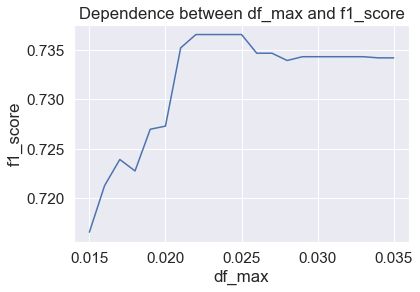

In [178]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0.015, 0.0351, 0.001), res)
plt.xlabel("df_max")
plt.ylabel("f1_score")
plt.title("Dependence between df_max and f1_score")

In [181]:
tfidf_vec = TfidfVectorizer(tokenizer=tokenizer, min_df=0.00047)
X_train_tfidf = tfidf_vec.fit_transform(text_train)
X_test_tfidf  = tfidf_vec.transform(text_test)

clf = LogisticRegression(max_iter=100)
clf.fit(X_train_tfidf, train.target)
f1_score(test.target, clf.predict(X_test_tfidf))

0.7464549064095292

In [218]:
%%time

tfidf_vec = TfidfVectorizer(tokenizer=optimized_tokenizer_with_lemmatization_and_without_stopwords, min_df=0.00047)
X_train_tfidf = tfidf_vec.fit_transform(text_train)
X_test_tfidf  = tfidf_vec.transform(text_test)

clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tfidf, train.target)
f1_score(test.target, clf.predict(X_test_tfidf))

Wall time: 1h 47min 5s


0.7257780387551379

In [235]:
%%time

tfidf_vec = TfidfVectorizer(tokenizer=optimized_tokenizer, min_df=0.00047)
X_train_tfidf = tfidf_vec.fit_transform(text_train)
X_test_tfidf  = tfidf_vec.transform(text_test)

clf = LogisticRegression(max_iter=300)
clf.fit(X_train_tfidf, train.target)
f1_score(test.target, clf.predict(X_test_tfidf))

Wall time: 2.17 s


0.7577290612703766

Используя **лучший** (на предыдущих примерах) токенайзер, не выбрасывающий стоп-слова и использующий стемминг, получилось добиться **хорошего** результата!!! ($0.7577290612703766$)

> Итак, потратив кучу времени на обучение модели с использованием кастомного токенайзера (**tokenizer** и др. версии) и перебор значений `min_df` и `max_df`, мы нашли оптимальные для данного случая. При этом с лучшим `max_df` модель показывает результаты чуть хуже, чем с лучшим `min_df`, поэтому именно на нём мы и остановились.
Также при установке `max_df = 0.9` ничего не меняется, т.к. веса сдвинуты ближе к $0$.

> В то же время, используя другие (стандартные) токенизаторы, удалось получить хорошие результаты на test'е.

> С использованием другого кастомного токенайзера (**optimized_tokenizer**, который не выбрасывает стоп-слова.) мы получили результат $0.76$ и $0.755$ для `CountVectorizer`'a и `TF-IDF Vectorizer`'a cоответственно. 

## Задание 10 (1 балл)

Еще один популярный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

> *This strategy has several advantages*:

> - it is very low memory scalable to large datasets as there is no need to store a vocabulary dictionary in memory.

> - it is fast to pickle and un-pickle as it holds no state besides the constructor parameters.

> - it can be used in a streaming (partial fit) or parallel pipeline as there is no state computed during fit.

In [182]:
from sklearn.feature_extraction.text import HashingVectorizer

##### Для нашего первого токенизатора:

In [200]:
res_hash = []

for n_features in np.arange(1000, 20001, 1000):
    print(f"{n_features = }")
    hashing_vec = HashingVectorizer(tokenizer=tokenizer, n_features=n_features)
    X_train_hashing = hashing_vec.fit_transform(text_train)
    X_test_hashing  = hashing_vec.transform(text_test)

    clf = LogisticRegression(max_iter=200)
    clf.fit(X_train_hashing, train.target)
    res_hash.append(f1_score(test.target, clf.predict(X_test_hashing)))
    print(res_hash[-1])

n_features = 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.6511627906976744
n_features = 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.6797915460335843
n_features = 3000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.6976744186046512
n_features = 4000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7074592074592074
n_features = 5000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7047289504036909
n_features = 6000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7128939828080229
n_features = 7000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7106184364060678
n_features = 8000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7161926871735343
n_features = 9000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7200929152148665
n_features = 10000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7218390804597701
n_features = 11000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7151162790697675
n_features = 12000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.717201166180758
n_features = 13000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7209847596717467
n_features = 14000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7208894090111176
n_features = 15000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.715606936416185
n_features = 16000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7269565217391304
n_features = 17000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.724941724941725
n_features = 18000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7252489748096074
n_features = 19000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7192575406032482
n_features = 20000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7227378190255219


> Зависимость `f1_score` от `n_features` представлена на графиках ниже.
Также попробуем для встроенного токенизатора и токенизатора, который хорошо показал себя с `CountVectorizer` и `TF-IDF Vectorizer` (которые не отбрасывает stop-words).

best_n_features = 16000 для нашего классификатора.


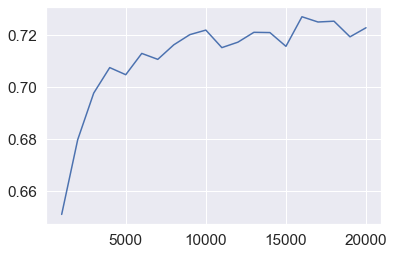

In [203]:
plt.plot(np.arange(1000, 20001, 1000), res_hash)
max_ind = np.argmax(res_hash)
best_n_features = np.arange(1000, 20001, 1000)[max_ind]
print(f'{best_n_features = } для нашего первого классификатора.')

##### Для улучшенного токенизатора:

In [227]:
res_hash = []

for n_features in np.arange(1000, 20001, 1000):
    print(f"{n_features = }")
    hashing_vec = HashingVectorizer(tokenizer=optimized_tokenizer, n_features=n_features)
    X_train_hashing = hashing_vec.fit_transform(text_train)
    X_test_hashing  = hashing_vec.transform(text_test)

    clf = LogisticRegression(max_iter=200)
    clf.fit(X_train_hashing, train.target)
    res_hash.append(f1_score(test.target, clf.predict(X_test_hashing)))
    print(res_hash[-1])

n_features = 1000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.6720183486238532
n_features = 2000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7014755959137344
n_features = 3000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.713961407491487
n_features = 4000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7151029748283751
n_features = 5000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7228229937393283
n_features = 6000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7300683371298405
n_features = 7000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7217441193344808
n_features = 8000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7241576242147344
n_features = 9000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.732876712328767
n_features = 10000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7299771167048056
n_features = 11000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7386877828054299
n_features = 12000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7393040501996576
n_features = 13000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7295742232451093
n_features = 14000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7263339070567986
n_features = 15000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7275862068965518
n_features = 16000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7305251009809579
n_features = 17000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7310344827586207
n_features = 18000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7265446224256292
n_features = 19000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7340909090909091
n_features = 20000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.7380541162924583


best_n_features = 12000 для нашего улучшенного токенизатора (0.7393040501996576).


Text(0.5, 1.0, 'With stop-words')

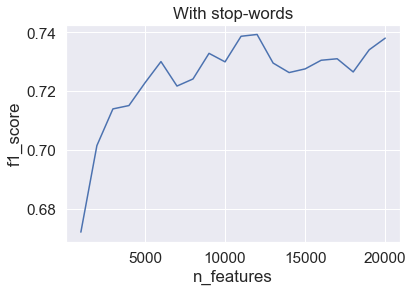

In [228]:
plt.plot(np.arange(1000, 20001, 1000), res_hash)
max_ind = np.argmax(res_hash)
best_n_features = np.arange(1000, 20001, 1000)[max_ind]
print(f'{best_n_features = } для нашего улучшенного токенизатора ({res_hash[max_ind]}).')
plt.xlabel("n_features")
plt.ylabel("f1_score")
plt.title("With stop-words")

In [208]:
# Взятие большого количества признаков также не делает результаты лучше :(((
hashing_vec = HashingVectorizer(tokenizer=optimized_tokenizer, n_features=50000)
X_train_hashing = hashing_vec.fit_transform(text_train)
X_test_hashing  = hashing_vec.transform(text_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train_hashing, train.target)
f1_score(test.target, clf.predict(X_test_hashing))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.736540664375716

In [219]:
hashing_vec = HashingVectorizer(tokenizer=optimized_tokenizer_with_lemmatization_and_without_stopwords, n_features=20000)
X_train_hashing = hashing_vec.fit_transform(text_train)
X_test_hashing  = hashing_vec.transform(text_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train_hashing, train.target)
f1_score(test.target, clf.predict(X_test_hashing))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.45638629283489096

**Лемматизация без стоп-слов** слов дала относительно **плохой** результат.

In [221]:
hashing_vec = HashingVectorizer(tokenizer=optimized_tokenizer_with_lemmatization_and_without_stopwords, n_features=16000)
X_train_hashing = hashing_vec.fit_transform(text_train)
X_test_hashing  = hashing_vec.transform(text_test)

clf = LogisticRegression(max_iter=300)
clf.fit(X_train_hashing, train.target)
f1_score(test.target, clf.predict(X_test_hashing))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.433201581027668

Уменьшили `n_features` --- стало ещё **хуже**

In [225]:
%%time

hashing_vec = HashingVectorizer(tokenizer=optimized_tokenizer_with_lemmatization, n_features=20000)
X_train_hashing = hashing_vec.fit_transform(text_train)
X_test_hashing  = hashing_vec.transform(text_test)

clf = LogisticRegression(max_iter=300)
clf.fit(X_train_hashing, train.target)
f1_score(test.target, clf.predict(X_test_hashing))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Wall time: 1h 46min 3s


0.6349598517603459

 > То есть лемматизация в нашем случае никак не лучше стемминга.
 
 > Применение `HashingVectorizer`'a никак не улучшает наши результаты **:(** 

##### Для default'ного токенизатора:

In [209]:
res_hash = []

for n_features in np.arange(1000, 20001, 1000):
    print(f"{n_features = }")
    hashing_vec = HashingVectorizer(n_features=n_features)
    X_train_hashing = hashing_vec.fit_transform(text_train)
    X_test_hashing  = hashing_vec.transform(text_test)

    clf = LogisticRegression(max_iter=200)
    clf.fit(X_train_hashing, train.target)
    res_hash.append(f1_score(test.target, clf.predict(X_test_hashing)))
    print(res_hash[-1])

n_features = 1000
0.6788280818131565
n_features = 2000
0.6767001114827201
n_features = 3000
0.7034327518289253
n_features = 4000
0.7162315550510784
n_features = 5000
0.7159796725014117
n_features = 6000
0.7130825379000562
n_features = 7000
0.7191392978482445
n_features = 8000
0.7152619589977222
n_features = 9000
0.7204058624577226
n_features = 10000
0.7228506787330317
n_features = 11000
0.7184684684684683
n_features = 12000
0.7275822928490352
n_features = 13000
0.7250141163184641
n_features = 14000
0.7200454287336739
n_features = 15000
0.7240793201133143
n_features = 16000
0.7278911564625851
n_features = 17000
0.7170454545454547
n_features = 18000
0.7232597623089981
n_features = 19000
0.7244897959183673
n_features = 20000
0.7234525837592278


best_n_features = 16000 для дефолтного токенизатора.


Text(0, 0.5, 'f1_score')

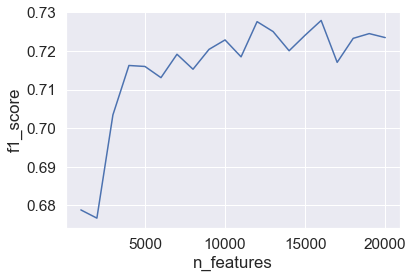

In [210]:
plt.plot(np.arange(1000, 20001, 1000), res_hash)
max_ind = np.argmax(res_hash)
best_n_features = np.arange(1000, 20001, 1000)[max_ind]
print(f'{best_n_features = } для дефолтного токенизатора.')
plt.xlabel("n_features")
plt.ylabel("f1_score")

> Всё равно не можем преодолеть порог в 0.74 :(((

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

### Итог:
- **Лучшие результаты**:
    - $0.760797342192691$ -- `CountVectorizer` + стемминг без удаления стоп-слов
    - $0.757729061270377$ -- `TfidfVectorizer` + стемминг без удаления стоп-слов + Сокращения размера матрицы (`min_df`=$0.00047$)
    - $0.754504504504505$ -- `TfidfVectorizer` + стемминг без удаления стоп-слов

### Using `ngram_range`

In [245]:
cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer, ngram_range=(3, 3))
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, train.target)
f1_score(test.target, clf.predict(X_test))

0.4477611940298507

Становится сильно хуже!!! Это, наверное, логично, потому что гораздо бОльшую роль играют символы, а не слова, как в литературе.

### Using  characters `ngram_range`

In [336]:
res = []
for i in range(1, 11):
    for j in range(i, 11):
        cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer, ngram_range=(i, j), analyzer='char')
        X_train = cnt_vec.fit_transform(text_train)
        X_test  = cnt_vec.transform(text_test)

        clf = LogisticRegression(max_iter=500)
        clf.fit(X_train, train.target)
        res.append(f1_score(test.target, clf.predict(X_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [343]:
indexes = []
for i in range(1, 11):
    for j in range(i, 11):
        indexes.append((i, j))

indexes[np.argmax(res)]

(3, 10)

In [345]:
cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer, ngram_range=(3, 10), analyzer='char')
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

clf = LogisticRegression(max_iter=300)
clf.fit(X_train, train.target)
print(f1_score(test.target, clf.predict(X_test)))

0.7520798668885191


> Получили также хороший результат!!!

### Using  SVM

In [282]:
from sklearn.svm import SVC

cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer)
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

Cs = np.arange(0.01, 2.1, 0.1)
svm_res = []
for C in Cs:
    svm = SVC(kernel = 'linear', C=C)
    svm.fit(X_train, train.target)
    svm_res.append(f1_score(test.target, svm.predict(X_test)))

Text(0, 0.5, '$f1\\_score$')

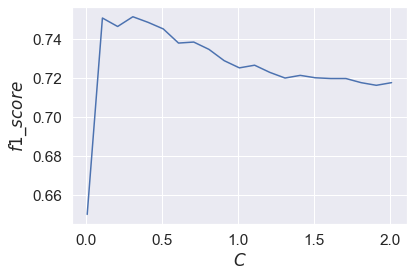

In [283]:
plt.plot(Cs, svm_res)
plt.xlabel("$C$")
plt.ylabel("$f1\_score$")

In [292]:
svm_res

[0.6502908855850033,
 0.7508571428571429,
 0.7465181058495822,
 0.7515085024684586,
 0.7486398258977148,
 0.7452677122769065,
 0.7380311995696611,
 0.738544474393531,
 0.734803657880581,
 0.729021913415286,
 0.7253333333333334,
 0.7266915290356952,
 0.7230196703880915,
 0.7201274561869357,
 0.7214854111405837,
 0.7202538339502909,
 0.7198731501057084,
 0.7198731501057084,
 0.7177589852008458,
 0.7164021164021164,
 0.7177589852008458]

In [288]:
Cs = np.arange(0.001, 0.65, 0.05)

svm_res_scaled = []
for C in Cs:
    svm = SVC(kernel = 'linear', C=C)
    svm.fit(X_train, train.target)
    svm_res_scaled.append(f1_score(test.target, svm.predict(X_test)))

Text(0, 0.5, '$f1\\_score$')

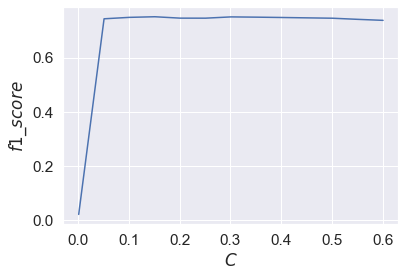

In [289]:
plt.plot(Cs, svm_res_scaled)
plt.xlabel("$C$")
plt.ylabel("$f1\_score$")

In [290]:
svm_res_scaled

[0.020470829068577275,
 0.743124634289058,
 0.7484240687679083,
 0.7507034327518288,
 0.7455357142857143,
 0.7454242928452579,
 0.7501372872048324,
 0.7491785323110624,
 0.7479586281981493,
 0.7466087900162779,
 0.7452677122769065,
 0.7411003236245954,
 0.73735199138859]

In [297]:
cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer)
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

svm = SVC(kernel = 'linear', C=0.31)
svm.fit(X_train, train.target)
print(f1_score(test.target, svm.predict(X_test)))

0.7515085024684586


^^^^^^^^^^^^^^^^^^^^^Лучший результат SVM, достигнутый опытным путём (установкой $С$)

In [308]:
Cs = np.arange(10, 101, 5)

svm_res_scaled_gr = []
for C in Cs:
    svm = SVC(kernel = 'linear', C=C)
    svm.fit(X_train, train.target)
    svm_res_scaled_gr.append(f1_score(test.target, svm.predict(X_test)))

Text(0, 0.5, '$f1\\_score$')

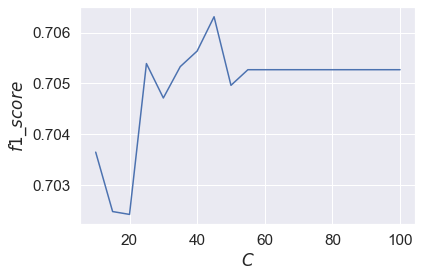

In [309]:
plt.plot(Cs, svm_res_scaled_gr)
plt.xlabel("$C$")
plt.ylabel("$f1\_score$")

In [314]:
cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer)
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

svm = SVC(kernel = 'rbf', C=0.31)
svm.fit(X_train, train.target)
print(f1_score(test.target, svm.predict(X_test)))

0.6444444444444445


Как можно заметить, тип ядра очень влияет на результат.

---

In [333]:
cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer, ngram_range=(1, 1))
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

svm = SVC(kernel = 'linear', C=0.31)
svm.fit(X_train, train.target)
print(f1_score(test.target, svm.predict(X_test)))

0.7515085024684586


Лучше результата добиться не получилось :( ни изменениями `ngram_range`, ни сменой ядра и поиска соответствующих параметров.

In [352]:
%%time

res = []
indexes = []
for i in range(1, 13, 2):
    for j in range(i, 13, 2):
        for C in np.arange(0.01, 2.1, 0.3):
            print(i, j, C, end='                ')  # Для отслеживания прогресса
            cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer, ngram_range=(i, j), analyzer='char')
            X_train = cnt_vec.fit_transform(text_train)
            X_test  = cnt_vec.transform(text_test)

            svm = SVC(kernel = 'linear', C=C)
            svm.fit(X_train, train.target)
            res.append(f1_score(test.target, svm.predict(X_test)))
            indexes.append((i, j, C))
            print(res[-1])

1 1 0.01                0.602571268865288
1 1 0.31                0.6061281337047353
1 1 0.61                0.6059250978200112
1 1 0.9099999999999999                0.6037946428571429
1 1 1.21                0.6049107142857142
1 1 1.51                0.6040268456375839
1 1 1.8099999999999998                0.6024636058230683
1 3 0.01                0.7330415754923413
1 3 0.31                0.7001023541453429
1 3 0.61                0.6966292134831461
1 3 0.9099999999999999                0.6955634880163182
1 3 1.21                0.6962736089841756
1 3 1.51                0.6932515337423312
1 3 1.8099999999999998                0.6952089704383282
1 5 0.01                0.7394328517924025
1 5 0.31                0.7352941176470589
1 5 0.61                0.7349081364829396
1 5 0.9099999999999999                0.7349081364829396
1 5 1.21                0.7349081364829396
1 5 1.51                0.7349081364829396
1 5 1.8099999999999998                0.7349081364829396
1 7 0.01      

In [353]:
%%time

res1 = []
indexes1 = []
for i in range(1, 6, 2):
    for j in range(i, 30, 5):
        for C in np.arange(0.01, 1.5, 0.1):
            print(i, j, C, end='                ') # Для отслеживания прогресса
            cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer, ngram_range=(i, j), analyzer='char')
            X_train = cnt_vec.fit_transform(text_train)
            X_test  = cnt_vec.transform(text_test)

            svm = SVC(kernel = 'linear', C=C)
            svm.fit(X_train, train.target)
            res1.append(f1_score(test.target, svm.predict(X_test)))
            indexes1.append((i, j, C))
            print(res1[-1])

1 1 0.01                0.602571268865288
1 1 0.11                0.6080178173719376
1 1 0.21000000000000002                0.6077777777777779
1 1 0.31000000000000005                0.6064659977703456
1 1 0.41000000000000003                0.6044692737430167
1 1 0.51                0.6067039106145251
1 1 0.6100000000000001                0.6062639821029082
1 1 0.7100000000000001                0.605248464544947
1 1 0.81                0.6045733407696597
1 1 0.91                0.6045733407696597
1 1 1.01                0.6041317699609156
1 1 1.11                0.6049107142857142
1 1 1.2100000000000002                0.6041317699609156
1 1 1.31                0.6045733407696597
1 1 1.4100000000000001                0.6048071548351034
1 6 0.01                0.7416576964477933
1 6 0.11                0.7390841320553779
1 6 0.21000000000000002                0.7372340425531915
1 6 0.31000000000000005                0.736954206602769
1 6 0.41000000000000003                0.73695420660276

In [354]:
indexes[np.argmax(res)]

(3, 11, 0.01)

In [365]:
cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer, ngram_range=(3, 11), analyzer='char')
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

svm = SVC(kernel = 'linear', C=0.01)
svm.fit(X_train, train.target)
print(f1_score(test.target, svm.predict(X_test)))

0.750694058856191


In [366]:
indexes1[np.argmax(res1)]

(3, 13, 0.01)

In [367]:
cnt_vec = CountVectorizer(tokenizer=optimized_tokenizer, ngram_range=(3, 13), analyzer='char')
X_train = cnt_vec.fit_transform(text_train)
X_test  = cnt_vec.transform(text_test)

svm = SVC(kernel = 'linear', C=0.01)
svm.fit(X_train, train.target)
print(f1_score(test.target, svm.predict(X_test)))

0.748040313549832


Получаем, что логистическая регрессия чуть более хороша в символьных $n$-граммах

> Таким образом, нам вновь не удаётся добиться лучшего результата. 